**House Sales in King County, USA**

# Business Understanding

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


%matplotlib inline

# Data Mining

In [336]:
path = './data/house_price.csv'
df = pd.read_csv(path, index_col='id')

In [102]:
print('# of rows:',df.shape[0])
print('# of cols:',df.shape[1])
df.sample(6)

# of rows: 21597
# of cols: 20


date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                             
7972602490  12/12/2014  220000.0         5       2.50         1760     10200   
9550202010   7/10/2014  775000.0         6       2.75         2980      5000   
8651520400   6/12/2014  610750.0         4       2.25         2180      7297   
3304300300    5/7/2015  579950.0         4       2.75         2460      8643   
8041100010   8/18/2014  377000.0         3       1.75         1820     34800   
7739100015    5/2/2014  463000.0         3       1.75         1710      7320   

            floors  waterfront  view  condition  grade  sqft_above  \
id                                                                   
7972602490     1.5         0.0   0.0          3      6        1760   
9550202010     1.5         0.0   0.0          3      7        2480   
8651520400     2.0         0.0   0.0          3      8        2180   
3304300300     2.0         0.0   0.0          3      9        2460   
8041100010     1.0         0.0   0.0          4      6        1820   
7739100015     1.0         0.0   0.0          3      7        1710   

           sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                            
7972602490           0.0      1925           0.0    98106  47.5271 -122.351   
9550202010         500.0      1916           NaN    98103  47.6684 -122.331   
8651520400           0.0      1984           NaN    98074  47.6459 -122.058   
3304300300           0.0      2011           0.0    98059  47.4828 -122.133   
8041100010           0.0      1967           0.0    98027  47.4616 -121.980   
7739100015           0.0      1948           0.0    98155  47.7512 -122.281   

            sqft_living15  sqft_lot15  
id                                     
7972602490           1370        7620  
9550202010           1470        5000  
8651520400           2250        9781  
3304300300           3110        8626  
8041100010           2570       52707  
7739100015           2260        8839

In [103]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

**Column Name Description**
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

# Data Cleaning

In [104]:
missing = pd.DataFrame(df.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/df.shape[0]*100,1)
missing[missing.Number!=0]

Number  Percentage
waterfront      2376        11.0
view              63         0.3
yr_renovated    3842        17.8

In [105]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Why is ` df['sqft_basement']` an object? 

In [106]:
print('df.sqft_basement DataType before change: ',  df['sqft_basement'].dtypes)

df.sqft_basement DataType before change:  object


In [107]:
def is_float(string):
    try:
        float(string)
        return True
    except ValueError:
        return False
    
for row in df['sqft_basement']:
    if not is_float(row):
        print(row) 

?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?


## Replace `?` in ` df['sqft_basement']` 

In [108]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

In [109]:
print(f'df.sqft_basement DataType after change: ',  df['sqft_basement'].dtypes)

df.sqft_basement DataType after change:  float64


## replace `NaN`in `df.view` with `0`

In [326]:
missing = pd.DataFrame(df.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/df.shape[0]*100,1)
missing[missing.Number!=0]

Number  Percentage
waterfront      2376        11.0
view              63         0.3
yr_renovated    3842        17.8

In [327]:
df.view = df.view.fillna(0)

## replace `NaN`in `df.waterfront` with `0`

In [328]:
df.waterfront = df.waterfront.fillna(0)

In [329]:
missing = pd.DataFrame(df.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/df.shape[0]*100,1)
missing[missing.Number!=0]

Number  Percentage
yr_renovated    3842        17.8

## replace `0` in `df.yr_renovated` with Na

<AxesSubplot:>

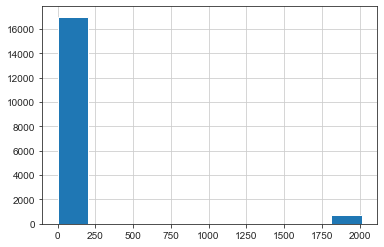

In [337]:
df.yr_renovated.hist()

In [338]:
df.yr_renovated.replace(0, np.nan, inplace=True)

<AxesSubplot:>

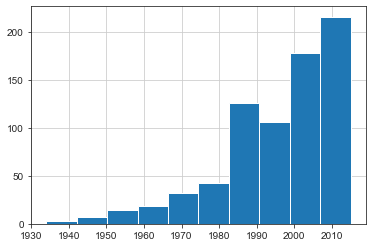

In [339]:
df.yr_renovated.hist()

## dtype(object) --> dtype(date)

In [114]:
var = 'date'
print(f'df.{var} DataType before change: ',  df[var].dtypes)

df.date DataType before change:  object


In [115]:
df.date.head(5)

id
7129300520    10/13/2014
6414100192     12/9/2014
5631500400     2/25/2015
2487200875     12/9/2014
1954400510     2/18/2015
Name: date, dtype: object

In [116]:
var = 'date'
df[var] = pd.to_datetime(df[var], errors='coerce', yearfirst=True)

In [117]:
df.date.head(2)

id
7129300520   2014-10-13
6414100192   2014-12-09
Name: date, dtype: datetime64[ns]

In [118]:
var = 'date'
print(f'df.{var} DataType after change: ',  df[var].dtypes)

df.date DataType after change:  datetime64[ns]


# Data Explo

## Categorical / Continious Data

In [119]:
def get_uniques(df, limit): 
    colm_lst = list(df.columns)
    print(' --- overview categorical Values ---  \n ')
    for colm in colm_lst: 
        if df[str(colm)].nunique() < limit: 
            print(f'{colm}: # of unique data:', df[str(colm)].nunique())
            print(f'{colm}: unique values: {df[str(colm)].unique()}  \n') 
            

get_uniques(df, 99)

 --- overview categorical Values ---  
 
bedrooms: # of unique data: 12
bedrooms: unique values: [ 3  2  4  5  1  6  7  8  9 11 10 33]  

bathrooms: # of unique data: 29
bathrooms: unique values: [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75 6.25
 6.5 ]  

floors: # of unique data: 6
floors: unique values: [1.  2.  1.5 3.  2.5 3.5]  

waterfront: # of unique data: 2
waterfront: unique values: [0. 1.]  

view: # of unique data: 5
view: unique values: [0. 3. 4. 2. 1.]  

condition: # of unique data: 5
condition: unique values: [3 5 4 1 2]  

grade: # of unique data: 11
grade: unique values: [ 7  6  8 11  9  5 10 12  4  3 13]  

yr_renovated: # of unique data: 70
yr_renovated: unique values: [   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980

In [346]:
colm_lst = list(df.columns)
continuous_var = [colm for colm in colm_lst if df[str(colm)].nunique() > 71]
continuous_var.append('yr_renovated')
continuous_var.append('floors')

print(len(continuous_var))
continuous_var

13


['date',
 'price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'yr_renovated',
 'floors']

In [246]:
categorical_var = [colm for colm in colm_lst if df[str(colm)].nunique() < 71]

categorical_var.remove('yr_renovated')
categorical_var.remove('floors')

print(len(categorical_var))
categorical_var

7


['bedrooms',
 'bathrooms',
 'waterfront',
 'view',
 'condition',
 'grade',
 'zipcode']

In [340]:
def check_missing(df,categorical_var,  continuous_var): 
    lst =  [col for col in list(df.columns) if (col not in categorical_var) and (col not in continuous_var)]
    if len(lst) > 0: 
        return lst
    else: 
        return print('non missing')
    
check_missing(df,categorical_var,  continuous_var)

non missing


## visual inspection

## Mapping Data

In [203]:
fig = px.scatter(df, x="long", y="lat", 
                 color="price", 
                 hover_data=['price'],
                 title="Price / Location Indication")

fig.show()

In [219]:
#documentation: https://plotly.com/python/reference/densitymapbox/
import plotly.express as px
fig = px.density_mapbox(df, lat='lat', lon='long', z='price', radius=4,
                        center=dict(lat=47.5, lon=-122.2), zoom=8.5, opacity=1, 
                        mapbox_style="open-street-map")
fig.show()

### scatter plots

/Users/jonasjaenicke/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/Users/jonasjaenicke/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

/Users/jonasjaenicke/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/Users/jonasjaenicke/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning:


The colNum attrib

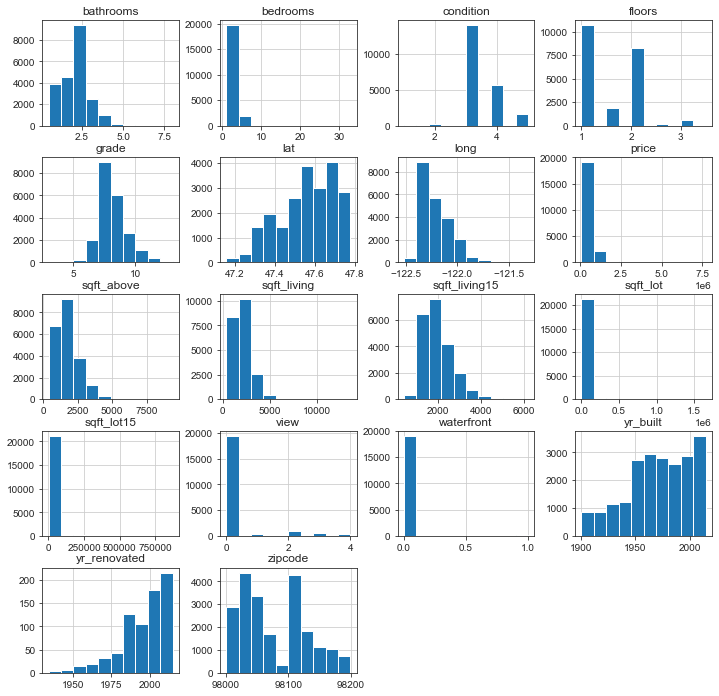

In [341]:
df.hist(figsize=(12,12));

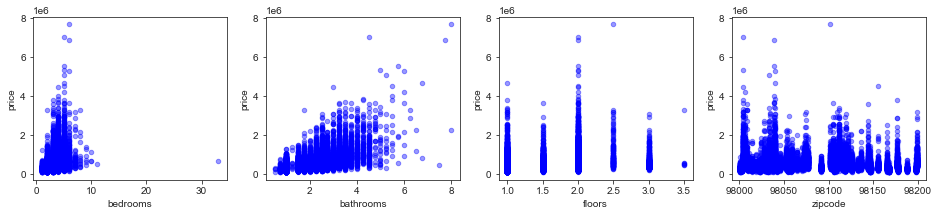

In [44]:
inspect = ['bedrooms', 'bathrooms', 'floors', 'zipcode']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax in zip(inspect, axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

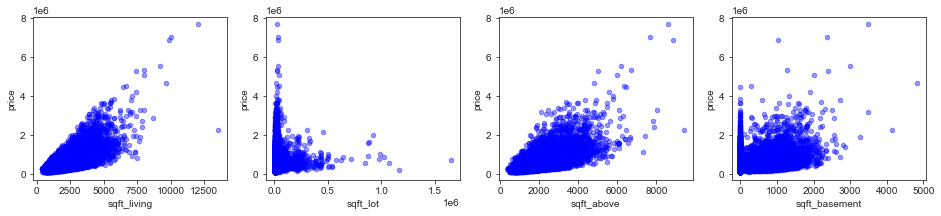

In [207]:
inspect = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax in zip(inspect, axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')


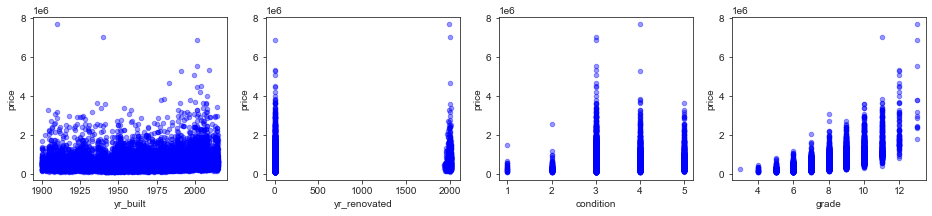

In [316]:
inspect = ['yr_built', 'yr_renovated', 'condition', 'grade']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax in zip(inspect, axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')


### Pairplots

In [344]:
continuous_var

['date',
 'price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'yr_renovated',
 'floors']

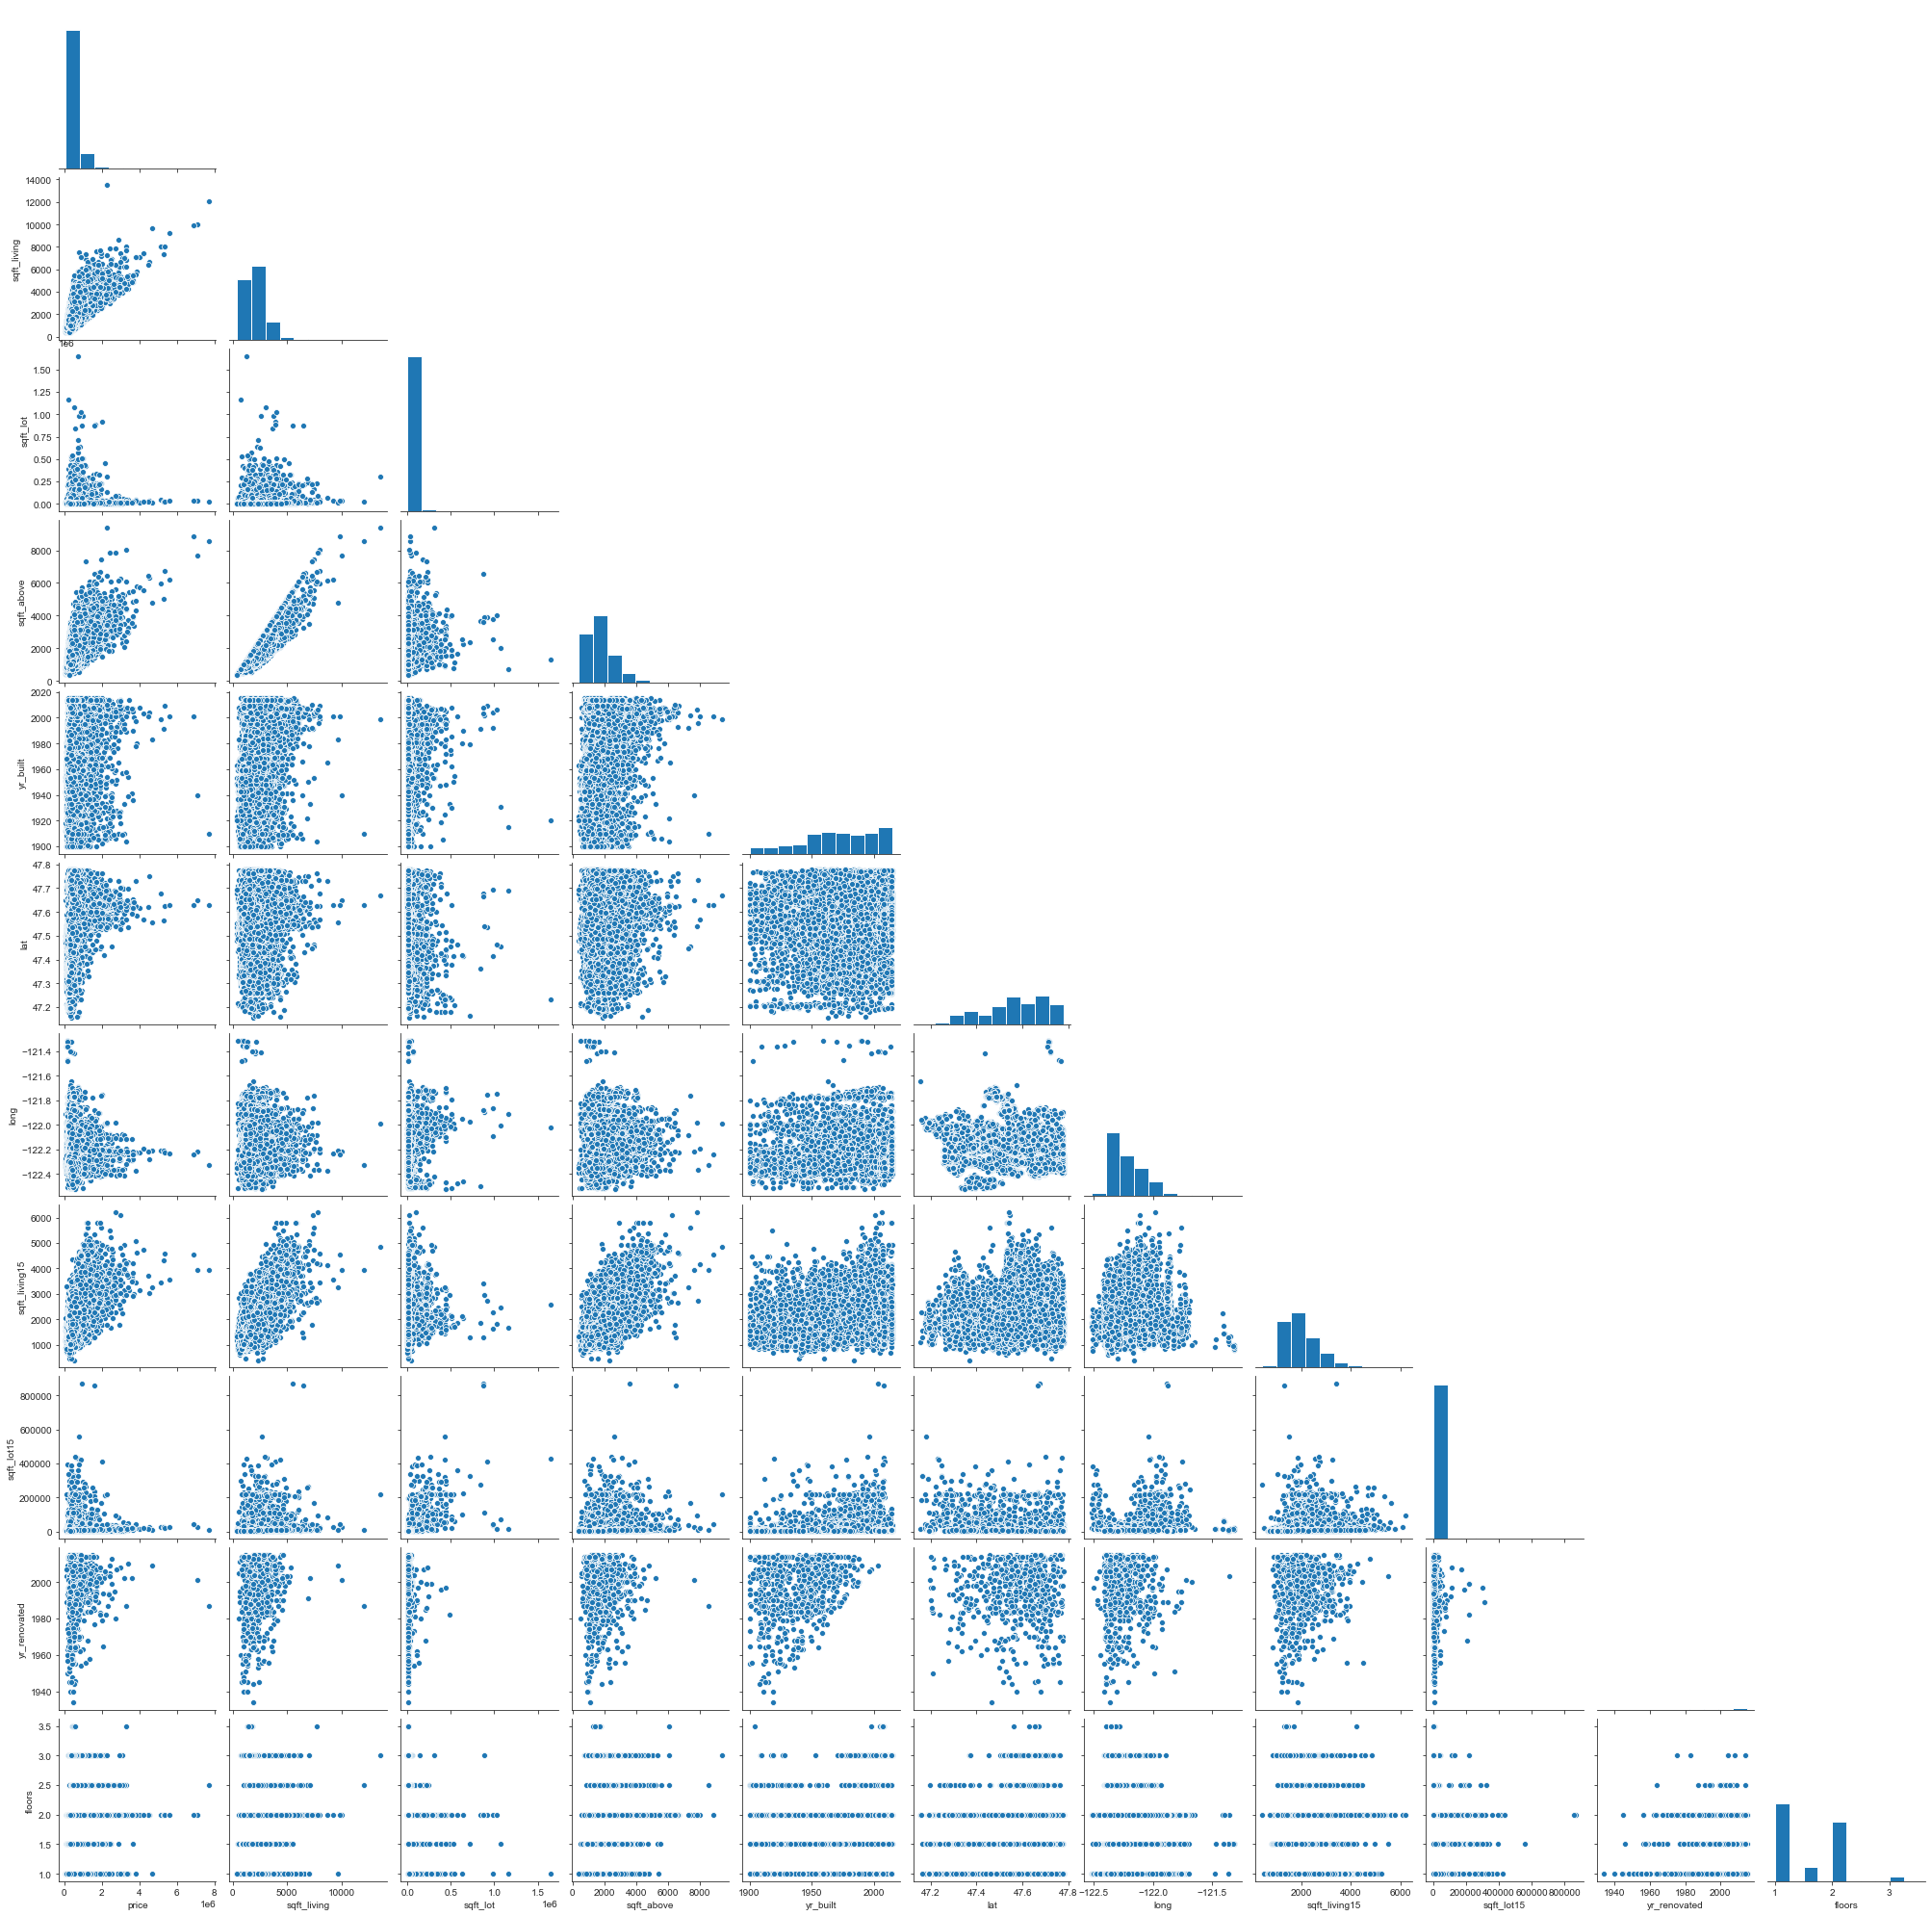

In [342]:
scope = df[continuous_var]
sns.pairplot(scope,corner=True, diag_kind = "hist");

### Correlation Heatmap

In [ ]:
X_dum=pd.get_dummies(df[continuous_var+categorical_var].copy())
mask = np.triu(X_dum.corr())
ax = sns.heatmap(round(X_dum.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm')
ax.set_ylim((0,11))
plt.show()

# Feature Engneering

## Add sells_per_zipcode coloumn

### MUSS NOCH VERÄNDERT WERDEN!!

In [310]:
df2 = df
zipcode_data = df2.groupby('zipcode').aggregate(np.mean)
zipcode_data.reset_index(inplace=True)

df2['sells_per_zipcode'] = 1
count_houses_zipcode = df2.groupby('zipcode').sum()
count_houses_zipcode.reset_index(inplace=True)
count_houses_zipcode = count_houses_zipcode[['zipcode','sells_per_zipcode']]
df2.drop(['sells_per_zipcode'], axis = 1, inplace = True)


zipcode_data = zipcode_data.join(count_houses_zipcode.set_index('zipcode'), on='zipcode')

zipcode_data.head().T

0              1              2             3  \
zipcode             98001.000000   98002.000000   98003.000000  9.800400e+04   
price              281194.869806  234284.035176  294111.278571  1.356524e+06   
bedrooms                3.393352       3.326633       3.357143  3.854890e+00   
bathrooms               2.011773       1.839196       2.047321  2.527603e+00   
sqft_living          1903.783934    1627.743719    1928.882143  2.909022e+03   
sqft_lot            14967.002770    7517.633166   10603.096429  1.310422e+04   
floors                  1.430748       1.334171       1.310714  1.432177e+00   
waterfront              0.000000       0.000000       0.000000  3.533569e-03   
view                    0.094708       0.010050       0.214286  3.069620e-01   
condition               3.335180       3.743719       3.371429  3.495268e+00   
grade                   7.296399       6.693467       7.542857  8.687697e+00   
sqft_above           1723.756233    1522.537688    1663.550000  2.419842e+03   
yr_built             1980.867036    1967.773869    1976.885714  1.971470e+03   
yr_renovated           28.038732      60.212121      16.641667  2.137595e+02   
lat                    47.309106      47.308780      47.315741  4.761618e+01   
long                 -122.270704    -122.213357    -122.310054 -1.222052e+02   
sqft_living15        1830.099723    1479.030151    1876.196429  2.674700e+03   
sqft_lot15          11218.875346    7585.482412    9746.178571  1.280502e+04   
sells_per_zipcode     361.000000     199.000000     280.000000  3.170000e+02   

                               4  
zipcode             98005.000000  
price              810289.696429  
bedrooms                3.851190  
bathrooms               2.424107  
sqft_living          2656.803571  
sqft_lot            19928.785714  
floors                  1.279762  
waterfront              0.000000  
view                    0.095238  
condition               3.696429  
grade                   8.488095  
sqft_above           2160.196429  
yr_built             1969.744048  
yr_renovated           57.985507  
lat                    47.611532  
long                 -122.167268  
sqft_living15        2567.863095  
sqft_lot15          18367.773810  
sells_per_zipcode     168.000000

# Predictive Modeling

# Data Visualisation